In [3]:
%cd /content/drive/MyDrive/cs336
!pip install faiss-gpu

/content/drive/.shortcut-targets-by-id/1sP7o5daSlx1NytWv52YdywaY_FFLXlui/cs336
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 12.1 MB/s eta 0:00:00


# Extraction

In [ ]:
!python src/extraction.py \
    --input_folder dataset/collection \
    --method Triplet \
    --index 1

# MAP

In [ ]:
import pandas as pd
map_10 = {
    'BOVW': 0.4305923351828358,
    'HOG': 0.3640910453823666,
    'VGG16': 0.5704787656143115,
    'VGG16-LSH': 0.8166049660196936,
    'VGG16-IVF': 0.6694966360531284,
    'VGG16-PQ': 0.7085457229745658,
    'VGG16-IVFPQ': 0.7049940801768044,
    'VGG16-SIAM': 0.8105932064727787,
    'VGG16-SIAM-PQ': 0.8071495889444599,
    'ResNet50-SIAM': 0.8608653989074283,
    'ResNet50-SIAM-PQ': 0.8538698508105588,
    'ResNet50-SIAM-GeM': 0.9285844605762568,
    'ResNet50-SIAM-GeM-PQ': 0.9237297196166779,
    'DELF': 0.8267735690635105,
    'DELF_IVF': 0.8411074629313302

}
map_50 = {
    'BOVW': 0.3167755286727217,
    'HOG': 0.28270785113619346,
    'VGG16': 0.4706630907760981,
    'VGG16-LSH': 0.6786272418578225,
    'VGG16-IVF': 0.5715840459531357,
    'VGG16-PQ': 0.5908390104308074,
    'VGG16-IVFPQ': 0.5907900342402094,
    'VGG16-SIAM': 0.782474427956743,
    'VGG16-SIAM-PQ': 0.781868372518958,
    'ResNet50-SIAM': 0.8321159274852054,
    'ResNet50-SIAM-PQ': 0.8294043779193783,
    'ResNet50-SIAM-GeM': 0.8355251191037055,
    'ResNet50-SIAM-GeM-PQ': 0.8328452754921059,
    'DELF':0.7345191755039192,
    'DELF_IVF': 0.7837228243079878

}

map_100 = {
    'BOVW': 0.26837788911372557,
    'HOG': 0.2381712426845129,
    'VGG16': 0.4123964471411159,
    'VGG16-LSH': 0.6085172017799023,
    'VGG16-IVF': 0.5260048690653836,
    'VGG16-PQ': 0.5283416121535778,
    'VGG16-IVFPQ': 0.5332057104719786,
    'VGG16-SIAM': 0.7723731404840455,
    'VGG16-SIAM-PQ':0.7724600661982939,
    'ResNet50-SIAM': 0.822521063635506,
    'ResNet50-SIAM-PQ': 0.820391768310212,
    'ResNet50-SIAM-GeM': 0.7798717369351367,
    'ResNet50-SIAM-GeM-PQ': 0.7800152510479381,
    'DELF':0.6889567585653243,
    'DELF_IVF': 0.7592432876012575

}
pd.DataFrame(
    [map_10, map_50, map_100], 
    index = ['MAP@10','MAP50','MAP@100']
).astype(object).T

,MAP@10,MAP50,MAP@100
BOVW,0.430592,0.316776,0.268378
HOG,0.364091,0.282708,0.238171
VGG16,0.570479,0.470663,0.412396
VGG16-LSH,0.816605,0.678627,0.608517
VGG16-IVF,0.669497,0.571584,0.526005
VGG16-PQ,0.708546,0.590839,0.528342
VGG16-IVFPQ,0.704994,0.59079,0.533206
VGG16-SIAM,0.810593,0.782474,0.772373
VGG16-SIAM-PQ,0.80715,0.781868,0.77246
ResNet50-SIAM,0.860865,0.832116,0.822521


In [ ]:
!python src/retrieval.py \
    --queries dataset/queries\
    --collection dataset/collection\
    --index indexes/ResNet50_SIAM_GeM.index.bin \
    --top 10

2023-02-08 16:15:43.184372: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
[INFO]: Calculate MAP ...
100% 1362/1362 [03:20<00:00,  6.80it/s]
0.9285844605762568


# Search

In [4]:
!python src/search.py \
        --query dataset/collection/10419/001a28351b7ba2f8.jpg \
        --collection dataset/collection \
        --index indexes/ResNet50_SIAM_GeM_PQ.index.bin \
        --top 25

2023-02-10 11:10:33.616354: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


In [5]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
def plot_result(topk, query_path, results):
    import cv2
    import matplotlib.pyplot as plt
    # Plot query
    query = cv2.imread(query_path)
    plt.title(query_path.split('/')[-2], fontsize=25)
    plt.imshow(cv2.cvtColor(query, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


    # Plot results

    fig = plt.figure(figsize=(15, 10))
    rows = 5
    columns = 5    


    for i in range(1, rows*columns+1):
        fig.add_subplot(rows, columns, i)
        image = cv2.imread(results[i-1])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis('off')
        plt.title(results[i-1].split('/')[-2], fontsize=25)

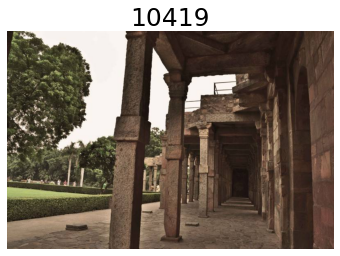

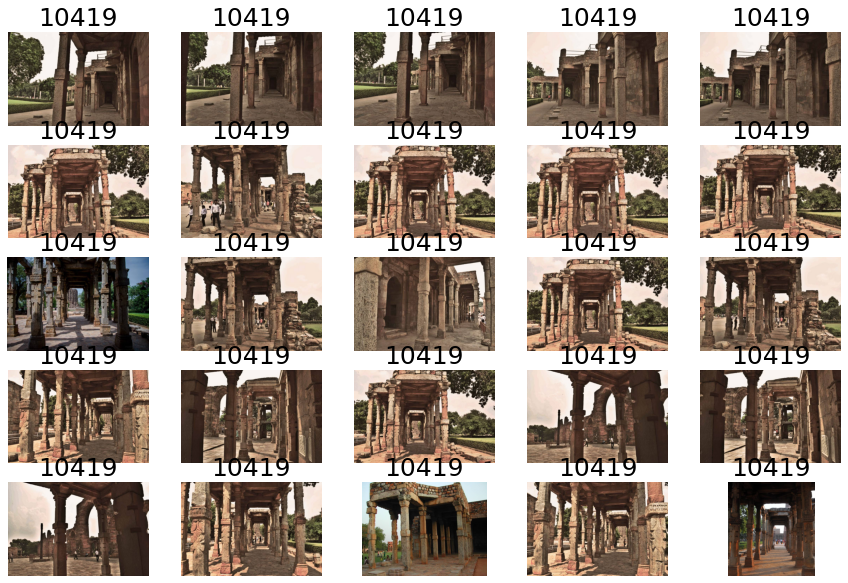

In [ ]:
# GeM
with open("/content/drive/MyDrive/cs336/output.txt", "r") as f:
  output = [line.rstrip('\n') for line in f.readlines()]
query = output[0]
result = output[1:]
plot_result(25, query, result)

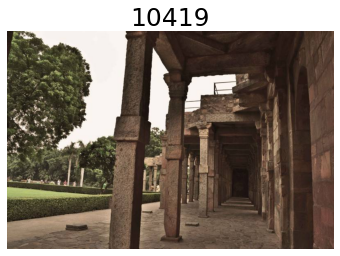

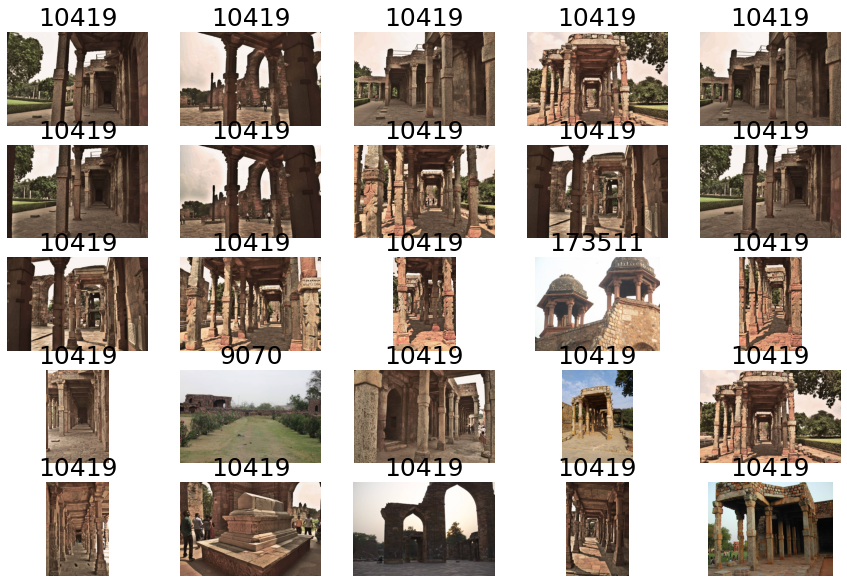

In [ ]:
# DELF
with open("/content/drive/MyDrive/cs336/output.txt", "r") as f:
  output = [line.rstrip('\n') for line in f.readlines()]
query = output[0]
result = output[1:]
plot_result(10, query, result)

# Searching method


In [ ]:
!pip install vptree
!pip install kdtree 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vptree: filename=vptree-1.3-py3-none-any.whl size=4562 sha256=9aecf3564c2e25f6ded6ef5b2b25c04d72854354b101401d515af7aa5ca5c044
  Stored in directory: /root/.cache/pip/wheels/ef/32/f4/8c19591ce188d4ae5e65150f788b91e5bf0afb42c9b5fdabde
Successfully built vptree
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import vptree
import kdtree

In [ ]:
features = np.load('/content/drive/MyDrive/cs336/feature_dataset/VGG16_SIAM_F.npz')['features']

In [ ]:
# Define distance function.
def euclidean(p1, p2):
  return np.sqrt(np.sum(np.power(p2 - p1, 2)))

## VP Tree

In [ ]:
tree = vptree.VPTree(features, euclidean)

In [ ]:
result = tree.get_n_nearest_neighbors(features[0], 10)
indices = []
for item in result:
    idx = np.where(np.all(features == item[1],axis=1))[0][0]
    indices.append(idx)
indices

[0, 994, 853, 1157, 903, 731, 334, 938, 931, 1268]

## KD Tree


In [ ]:
list_features = features.tolist()
tree = kdtree.create(list_features)

In [ ]:
result = tree.search_knn(features[0], 10, dist=euclidean)
indices = []
for item in result:
    idx = np.where(np.all(features == np.array(item[0].data),axis=1))[0][0]
    indices.append(idx)
indices

[0, 994, 853, 1157, 903, 731, 334, 938, 931, 1268]